# Import Libraies

In [36]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load Data

In [37]:
# I will load the rating and movies datasets
movies = pd.read_csv('/content/drive/MyDrive/Recommender Dataset/Project/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Recommender Dataset/Project/ml-latest-small/ratings.csv')

In [30]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Data Preprocessing

In [5]:
ratings.isnull().sum(), movies.isnull().sum()

(userId       0
 movieId      0
 rating       0
 timestamp    0
 dtype: int64,
 movieId    0
 title      0
 genres     0
 dtype: int64)

In [38]:
# Merge dataset to create movieID
data = pd.merge(ratings, movies, on='movieId')
data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [42]:
# show maximum usedId
data['userId'] = data['userId']
data['userId'].max()

610

# Data Exploration

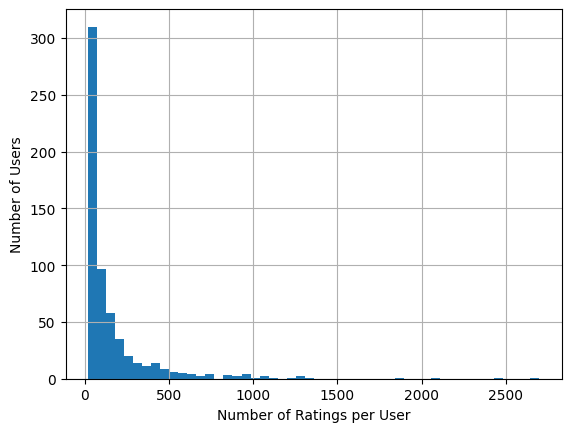

In [10]:
# number of rating by user
ratings_per_user = data.groupby('userId').size()
ratings_per_user.hist(bins=50)
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.show()

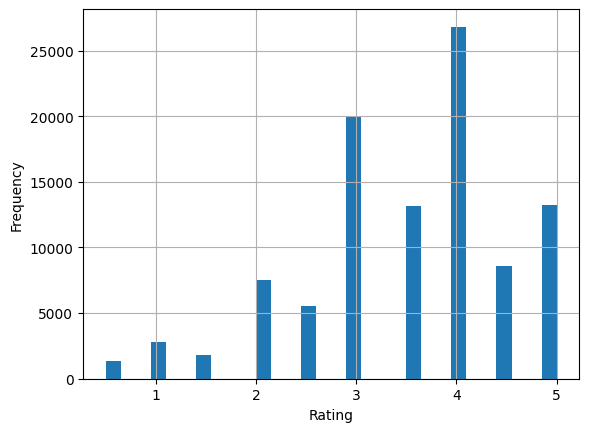

In [11]:
# Distribution of movie ratings
ratings['rating'].hist(bins=30)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# User-Based Collaborative Filtering

In [14]:
# Create user-item matrix
user_item_matrix = data.pivot_table(index='userId', columns='movieId', values='rating')

In [15]:
# Fill missing values with 0
user_item_matrix.fillna(0, inplace=True)

In [16]:
# Compute user similarity matrix
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


# Generate Recommendation

In [17]:
def get_top_n_recommendations(user_id, n=10):
    # Get the similarity scores for the given user
    user_sim_scores = user_similarity_df[user_id]

    # Multiply the similarity scores with the user-item matrix to get a score for each item
    user_scores = user_sim_scores.dot(user_item_matrix)

    # Get the top N recommendations
    recommendations = user_scores.sort_values(ascending=False).head(n)

    return recommendations

In [18]:
# Test
user_id = 1
top_recommendations = get_top_n_recommendations(user_id, n=10)
top_recommendations

movieId
356     223.752553
296     223.031731
318     215.449703
2571    207.757121
260     204.800629
593     202.048519
1196    186.109582
110     173.727362
480     171.657045
589     169.401182
Name: 1, dtype: float64

In [22]:
# To show the movie name
# Function to get top N recommendations
def get_top_n_recommendations(user_id, n=10):
    user_sim_scores = user_similarity_df[user_id]
    user_scores = user_sim_scores.dot(user_item_matrix)
    user_scores = user_scores.sort_values(ascending=False).head(n)
    user_scores = user_scores.reset_index()
    user_scores.columns = ['movieId', 'score']
    return user_scores

In [21]:
user_id = 3
top_recommendations = get_top_n_recommendations(user_id, n=10)

# Merge with movie titles
top_recommendations_with_titles = pd.merge(top_recommendations, movies, on='movieId')

# Display the recommendations with movie titles
print(top_recommendations_with_titles[['movieId', 'title', 'score']])

   movieId                                              title      score
0      260          Star Wars: Episode IV - A New Hope (1977)  14.921165
1     1196  Star Wars: Episode V - The Empire Strikes Back...  14.367949
2     2571                                 Matrix, The (1999)  13.746875
3      356                                Forrest Gump (1994)  13.224027
4      593                   Silence of the Lambs, The (1991)  12.997949
5     1210  Star Wars: Episode VI - Return of the Jedi (1983)  12.814044
6      296                                Pulp Fiction (1994)  12.616895
7     1214                                       Alien (1979)  12.499908
8     1198  Raiders of the Lost Ark (Indiana Jones and the...  12.273846
9      589                  Terminator 2: Judgment Day (1991)  11.993514


In [24]:
# Evaluation
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2)

# Create user-item matrices for training and testing sets
train_user_item_matrix = train_data.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
test_user_item_matrix = test_data.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Compute similarity matrix for training set
train_user_similarity = cosine_similarity(train_user_item_matrix)

# Generate recommendations for each user in the test set and calculate RMSE
def calculate_rmse(test_data, user_similarity, train_user_item_matrix):
    errors = []
    for index, row in test_data.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        actual_rating = row['rating']

        if user_id in user_similarity_df.index and movie_id in train_user_item_matrix.columns:
            user_sim_scores = user_similarity_df[user_id]
            user_scores = user_sim_scores.dot(train_user_item_matrix)
            predicted_rating = user_scores[movie_id]
            errors.append((predicted_rating - actual_rating) ** 2)

    rmse = np.sqrt(np.mean(errors))
    return rmse

In [25]:
rmse = calculate_rmse(test_data, train_user_similarity, train_user_item_matrix)
rmse

51.851365696067404